In [13]:
# Dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set("notebook", font_scale=1.05, rc={"figure.figsize": (10, 5)})
sns.set_style("ticks", rc={"figure.facecolor": "none", "axes.facecolor": "none"})
%config InlineBackend.figure_format = 'svg'
warnings.filterwarnings("ignore")
plt.set_loglevel("WARNING")
mpl.rcParams["lines.markersize"] = 8

### Configurations

In [25]:
BASE_DIR = "/home/emerge/daphne/gpudrive/examples/experiments/eval/dataframes/"

RES_TRAIN = "train_2025-01-01-15-44-47.csv"
RES_TEST = "..."

In [26]:
# Load the data
df_train = pd.read_csv(f"{BASE_DIR}{RES_TRAIN}", index_col=0)

In [27]:
df_train

,scene,goal_achieved,collided,off_road,controlled_agents_in_world,dataset
0,tfrecord-00019-of-01000_58,0.000000,0.000000,0.000000,8,train
1,tfrecord-00032-of-01000_341,0.250000,0.000000,0.250000,4,train
2,tfrecord-00014-of-01000_79,0.500000,0.000000,0.250000,4,train
3,tfrecord-00023-of-01000_200,0.111111,0.222222,0.222222,9,train
4,tfrecord-00023-of-01000_211,0.000000,0.000000,0.500000,4,train
...,...,...,...,...,...,...
995,tfrecord-00015-of-01000_22,0.000000,0.285714,0.428571,7,train
996,tfrecord-00019-of-01000_68,0.333333,0.000000,0.000000,3,train
997,tfrecord-00023-of-01000_254,0.200000,0.400000,0.000000,5,train
998,tfrecord-00014-of-01000_339,0.166667,0.000000,0.000000,6,train


### 1. Aggregate performance (todo)

- Aggregate performance train dataset
- Aggregate performance test dataset

In [38]:
train_dataset = df_train.shape[0]

In [41]:
aggregate_std

goal_achieved    0.184618
collided         0.145246
off_road         0.177524
dtype: float64

In [54]:
plot_data["StdDev"]

0    0.184618
1    0.145246
2    0.177524
Name: StdDev, dtype: float64

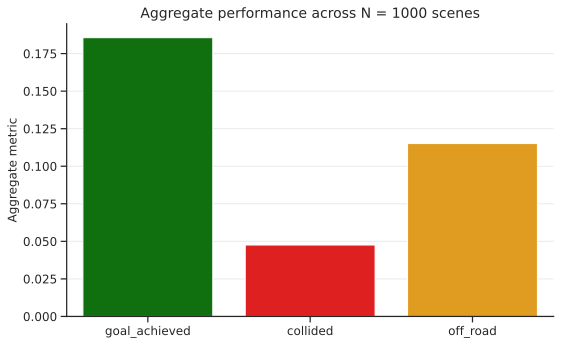

In [55]:
aggregate_mean = df_train[['goal_achieved', 'collided', 'off_road']].mean().clip(lower=0)
aggregate_std = df_train[['goal_achieved', 'collided', 'off_road']].std().clip(lower=0)

# Prepare data for seaborn
plot_data = pd.DataFrame({
    "Metric": aggregate_mean.index,
    "Average": aggregate_mean.values,
    "StdDev": aggregate_std.values
})

# Plot using seaborn
plt.figure(figsize=(8, 5))
sns.barplot(
    data=plot_data, 
    x="Metric", 
    y="Average", 
    palette=["green", "red", "orange"],
    #errorbar=plot_data["StdDev"].values,
)

# Customize the plot
plt.title(f'Aggregate performance across N = {len(df_train)} scenes', fontsize=14)
plt.ylabel('Aggregate metric', fontsize=12)
plt.xlabel('', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.4)
sns.despine()
plt.tight_layout()
plt.show()

### 2. Scaling laws (todo)

### 3. 